# #JSON 데이터 수집

## ## 인터넷을 통해 수집할 수 있는 데이터의 형식

형식 |
설명<br>
TEXT | 단순텍스트 파일을 내려받아서 문자열 변수에 저장해야 함<br>
CSV,XLSX | Pandas가 자체적으로 처리 가능<br>
JSON requests | 모듈을 통해 데이터를 받아온 후 JSON 클래스를 통해 DataFrame으로 변환<br>
HTML,XML | requests 모듈을 통해 문자열 형태로 내려받고 BeautifulSoup 클래스를 통해 데이터 추출<br>
이미지,동영상 | requests 모듈을 통해 직접 파일 다운로드 구현<br>

## requests 모듈
HTTP 통신 기능을 제공하는 파이썬 패키지

명령프롬프트를 관리자 권한으로 실행한 후 다음의 명령어로 설치

- pip install --upgrade requests

--upgrade 옵션은 이미 설치가 되어 있다면 최신버전으로 교체하는 옵션

In [30]:
## #01. 필요한 패키지 가져오기

import requests
import json
from pandas import DataFrame
from matplotlib import pyplot

--------------------
## #02.간단한 텍스트 데이터 가져오기

텍스트 데이터 URL

In [16]:
simple_text_url = 'http://itpaper.co.kr/demo/python/simple_text.txt'

특정 웹 페이지에 접속

In [17]:
r = requests.get(simple_text_url)
r

<Response [200]>

접속에 실패한 경우에 대한 예외처리

- 200 : OK
- 400,403 : 잘못된 접근 혹은 접근 권한 없음
- 404 : Page Not Found(URL오타)
- 50x : Server Error(접속 대상이 에러인 상황)

In [18]:
if r.status_code != 200:
    #에러코드와 에러메시지 출력
    print("[%d Error] $s" % (r.status_code, r.reason))
    #프로그램 강제 종료
    quit()

텍스트 데이터 추출

In [19]:
# 인코딩 형식 지정(대상 파일이 저장된 방식을 명시해야 함)
r.encoding = "utf-8"

#텍스트 출력
r.text

'Hello Python~!!!\n안녕하세요. 파이썬~!!!\n'

--------------------
## #03.간단한 JSON 데이터 가져오기

requests 모듈이 지정된 URL의 내용을 모두 텍스트로만 가져오기 때문에 가져온 데이터의 형식에 따라 변환 처리가 필요하다

간단한 JSON 데이터 가져오기

In [31]:
#URL 지정
simple_json_url = 'http://itpaper.co.kr/demo/python/simple.json'

#데이터 가져오기
r = requests.get(simple_json_url)

# 결과 검사
if r.status_code != 200:
    #에러코드와 에러메시지 출력
    print("[%d Error] $s" % (r.status_code, r.reason))
    #프로그램 강제 종료
    quit()
    
# 인코딩 형식 지정(대상 파일이 저장된 방식을 명시해야 함)
r.encoding = "utf-8"

#텍스트 출력
print(type(r.text))
r.text    

<class 'str'>


'{\n    "name": "갤럭시 S6",\n    "type": "삼성",\n    "img": "http://itpaper.co.kr/demo/app/img/GalaxyS6.png"\n}'

## 딕셔너리를 DataFrame으로 변환

DataFrame을 생성이 가능한 파라미터 형식

- 2차 리스트
- 리스트를 포함한 딕셔너리
- 딕셔너리를 포함한 리스트

수신 결과는 단순한 딕셔너리 이므로 이 값을 통째로 리스트에 넣어줘야 한다.

## #JSON 형식의 문자열을 딕셔너리로 변환

In [38]:
result = json.loads(r.text)

print(type(result))
result

<class 'dict'>


{'name': '갤럭시 S6',
 'type': '삼성',
 'img': 'http://itpaper.co.kr/demo/app/img/GalaxyS6.png'}

In [39]:
simple_df = DataFrame([result])
simple_df

,name,type,img
0,갤럭시 S6,삼성,http://itpaper.co.kr/demo/app/img/GalaxyS6.png


--------------------
## #04.리스트 형식의 데이터를 포함하는 JSON
### 1) 데이터 수집
#### JSON 가져 오기

In [45]:
# 간단한 JSON List URL
json_list_url = 'http://itpaper.co.kr/demo/python/student.json'

#웹페이지에 접속해서 데이터 가져오기
r = requests.get(json_list_url)

# 결과 검사
if r.status_code != 200:
    #에러코드와 에러메시지 출력
    print("[%d Error] $s" % (r.status_code, r.reason))
    #프로그램 강제 종료
    quit()
    
# 인코딩 형식 지정(대상 파일이 저장된 방식을 명시해야 함)
r.encoding = "utf-8"

#텍스트 출력
result = json.loads(r.text)
result

{'student': [{'name': '철수', 'math': 85, 'kor': 80, 'eng': 70},
  {'name': '영이', 'math': 92, 'kor': 70, 'eng': 85},
  {'name': '순이', 'math': 61, 'kor': 100, 'eng': 72}]}

데이터프레임으로 변환

- 가져온 결과에서 student 키에 해당하는 리스트를 추출하여 이를 데이터 프레임으로 변환한다

In [47]:
student_df = DataFrame(result['student'])
student_df

,name,math,kor,eng
0,철수,85,80,70
1,영이,92,70,85
2,순이,61,100,72


2) 데이터 전처리

학생이름을 인덱스로 변경

In [48]:
# mame 열의 값을 인덱스로 사용하기 위해 리스트 형식으로 추출
name_list = list(student_df['name'])
print(name_list)

# 데이터 프레임의 rename 함수에 적용하기 위한 딕셔너리 생성
name_dict = {}
for i, v in enumerate(name_list):
    name_dict[i] = v
    
# 데이터 프레임의 인덱스, 컬럼이름 변경 및 name 컬럼 삭제
성적표df = student_df.rename(index=name_dict, columns={'math':'수학','kor':'국어','eng':'영어'})
성적표df.drop('name', axis=1, inplace=True)
성적표df

['철수', '영이', '순이']


,수학,국어,영어
철수,85,80,70
영이,92,70,85
순이,61,100,72


컬럼순서 변경

In [50]:
성적표df = 성적표df.reindex(columns=['국어','영어','수학'])
성적표df

,국어,영어,수학
철수,80,70,85
영이,70,85,92
순이,100,72,61


3) 데이터 시각화

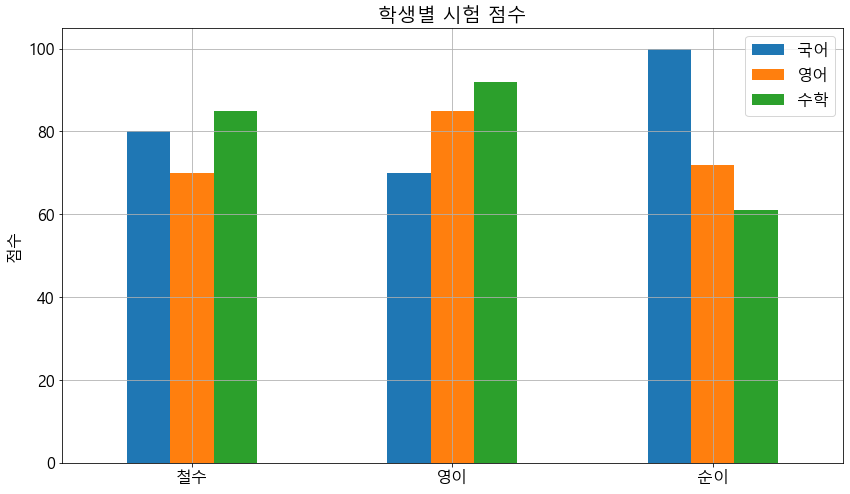

In [53]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (14,8)

# 전체 컬럼에 대한 시각화
성적표df.plot.bar(rot=0)
pyplot.title("학생별 시험 점수")
pyplot.grid()
pyplot.legend()
pyplot.ylabel("점수")

pyplot.show()

--------------------
## #05.파일 다운로드
### 1) 데이터 가져오기

In [60]:
# 다운로드 할 대상의 URL
file_url = 'http://itpaper.co.kr/demo/python/grade.csv'

# URLS에 
r = requests.get(file_url, stream=True) 

# 결과 검사
if r.status_code != 200:
    #에러코드와 에러메시지 출력
    print("[%d Error] $s" % (r.status_code, r.reason))
    #프로그램 강제 종료
    quit()

2) raw 데이터 저장하기

In [62]:
# 수집 결과의 바이너리(이진값) 데이터를 추출
data = r.raw.read()

# 추출한 데이터를 저장
# -> 'w': 텍스트 쓰기 모드, 'wb' : 바이너리(이진값) 쓰기 모드
with open("grade.csv",'wb') as f:
    f.write(data)

----------------------------
### 외부 데이터를 크롤링하는 방법을 찾는다. 네이버 메인은 그냥 html 크롤링,,실제 필요한건 정리된 자료..그런데 이건건 막혀있다
### 이런 데이터를 뚫는 방법..로긴이 필요한 것도 뚫는 방법 찾는다
----------------------------